In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
import sys
import os

# Add src to path to import our data loader
sys.path.append('../src')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print(" Libraries imported successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")

 Libraries imported successfully!
 Pandas version: 2.3.3
 NumPy version: 2.3.5


In [3]:
from data_loader import load_insurance_data

print(" Loading insurance data...")

# Load the data (use sample_size=10000 for testing if dataset is large)
# Remove sample_size parameter for full dataset
try:
    # Try with full dataset first
    df = load_insurance_data(
        data_path='../data/raw/MachineLearningRating_v3.txt',
        clean=True,
        convert_dtypes=True
    )
    print(f" Data loaded successfully!")
    
except Exception as e:
    print(f"  Error loading full dataset: {e}")
    print(" Trying with sample for testing...")
    # Fallback to sample
    df = load_insurance_data(
        data_path='../data/raw/insurance_data.txt',
        sample_size=10000,
        clean=True,
        convert_dtypes=True
    )
    print(f" Sample data loaded successfully!")

print(f"\n Dataset loaded:")
print(f"   • Rows: {df.shape[0]:,}")
print(f"   • Columns: {df.shape[1]:,}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

 Loading insurance data...
📁 Loading data from: ../data/raw/MachineLearningRating_v3.txt
 Loaded full dataset: 1,000,098 rows, 52 columns

  BASIC DATA INFORMATION:
   Shape: (1000098, 52)
   Memory usage: 2373.96 MB
   Time period: 2013-10-01 00:00:00 to 2015-08-01 00:00:00
   Numeric columns: 15
   Categorical columns: 36

 Cleaning column names...
 Column names cleaned. Examples:
   UnderwrittenCoverID → underwrittencoverid
   PolicyID → policyid
   TransactionMonth → transactionmonth
   IsVATRegistered → isvatregistered
   Citizenship → citizenship

 Converting data types...
    transactionmonth converted to datetime
 Data type conversion complete
 Data loaded successfully!

 Dataset loaded:
   • Rows: 1,000,098
   • Columns: 52
   • Memory usage: 2309.1 MB


In [4]:
print("="*60)
print("INITIAL DATA INSPECTION")
print("="*60)

# Display first few rows
print("\n First 5 rows of the dataset:")
display(df.head())

# Display last few rows
print("\n Last 5 rows of the dataset:")
display(df.tail())

# Display column information
print("\n Column Information:")
print(f"Total columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

INITIAL DATA INSPECTION

 First 5 rows of the dataset:


,underwrittencoverid,policyid,transactionmonth,isvatregistered,citizenship,legaltype,title,language,bank,accounttype,maritalstatus,gender,country,province,postalcode,maincrestazone,subcrestazone,itemtype,mmcode,vehicletype,registrationyear,make,model,cylinders,cubiccapacity,kilowatts,bodytype,numberofdoors,vehicleintrodate,customvalueestimate,alarmimmobiliser,trackingdevice,capitaloutstanding,newvehicle,writtenoff,rebuilt,converted,crossborder,numberofvehiclesinfleet,suminsured,termfrequency,calculatedpremiumperterm,excessselected,covercategory,covertype,covergroup,section,product,statutoryclass,statutoryrisktype,totalpremium,totalclaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.00,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.93,0.00
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.00,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.93,0.00
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.00,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.00,0.00
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,"119,300.00",Monthly,584.65,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.85,0.00
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,"119,300.00",Monthly,584.65,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.00,0.00



 Last 5 rows of the dataset:


,underwrittencoverid,policyid,transactionmonth,isvatregistered,citizenship,legaltype,title,language,bank,accounttype,maritalstatus,gender,country,province,postalcode,maincrestazone,subcrestazone,itemtype,mmcode,vehicletype,registrationyear,make,model,cylinders,cubiccapacity,kilowatts,bodytype,numberofdoors,vehicleintrodate,customvalueestimate,alarmimmobiliser,trackingdevice,capitaloutstanding,newvehicle,writtenoff,rebuilt,converted,crossborder,numberofvehiclesinfleet,suminsured,termfrequency,calculatedpremiumperterm,excessselected,covercategory,covertype,covergroup,section,product,statutoryclass,statutoryrisktype,totalpremium,totalclaims
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"500,000.00",Monthly,395.85,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.24,0.00
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"500,000.00",Monthly,395.85,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.24,0.00
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"500,000.00",Monthly,395.85,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.24,0.00
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"5,000,000.00",Monthly,2.64,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.31,0.00
1000097,31519,389,2015-02-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"5,000,000.00",Monthly,2.64,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.31,0.00



 Column Information:
Total columns: 52

Column names:
  1. underwrittencoverid
  2. policyid
  3. transactionmonth
  4. isvatregistered
  5. citizenship
  6. legaltype
  7. title
  8. language
  9. bank
 10. accounttype
 11. maritalstatus
 12. gender
 13. country
 14. province
 15. postalcode
 16. maincrestazone
 17. subcrestazone
 18. itemtype
 19. mmcode
 20. vehicletype
 21. registrationyear
 22. make
 23. model
 24. cylinders
 25. cubiccapacity
 26. kilowatts
 27. bodytype
 28. numberofdoors
 29. vehicleintrodate
 30. customvalueestimate
 31. alarmimmobiliser
 32. trackingdevice
 33. capitaloutstanding
 34. newvehicle
 35. writtenoff
 36. rebuilt
 37. converted
 38. crossborder
 39. numberofvehiclesinfleet
 40. suminsured
 41. termfrequency
 42. calculatedpremiumperterm
 43. excessselected
 44. covercategory
 45. covertype
 46. covergroup
 47. section
 48. product
 49. statutoryclass
 50. statutoryrisktype
 51. totalpremium
 52. totalclaims


In [5]:
print("="*60)
print("DATA TYPES AND BASIC STATISTICS")
print("="*60)

# Data types
print("\n🔍 Data Types:")
dtype_summary = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes,
    'non_null_count': df.count(),
    'null_count': df.isnull().sum(),
    'null_percentage': (df.isnull().sum() / len(df)) * 100
})

print(dtype_summary.to_string())

# Basic statistics for numeric columns
print("\n Basic Statistics for Numeric Columns:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    numeric_stats = df[numeric_cols].describe().T
    numeric_stats['missing_%'] = (df[numeric_cols].isnull().sum() / len(df)) * 100
    display(numeric_stats)
else:
    print(" No numeric columns found")

# Basic statistics for categorical columns
print("\n🔤 Basic Statistics for Categorical Columns (Top 5 by unique values):")
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    cat_stats = []
    for col in cat_cols[:5]:  # Show first 5 categorical columns
        unique_vals = df[col].nunique()
        most_common = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
        most_common_pct = (df[col] == most_common).mean() * 100 if most_common != 'N/A' else 0
        cat_stats.append({
            'column': col,
            'unique_values': unique_vals,
            'most_common': most_common,
            'most_common_%': f"{most_common_pct:.1f}%"
        })
    display(pd.DataFrame(cat_stats))
else:
    print(" No categorical columns found")

DATA TYPES AND BASIC STATISTICS

🔍 Data Types:
                                            column           dtype  non_null_count  null_count  null_percentage
underwrittencoverid            underwrittencoverid           int64         1000098           0             0.00
policyid                                  policyid           int64         1000098           0             0.00
transactionmonth                  transactionmonth  datetime64[ns]         1000098           0             0.00
isvatregistered                    isvatregistered            bool         1000098           0             0.00
citizenship                            citizenship          object         1000098           0             0.00
legaltype                                legaltype          object         1000098           0             0.00
title                                        title          object         1000098           0             0.00
language                                  language       

,count,mean,std,min,25%,50%,75%,max,missing_%
underwrittencoverid,"1,000,098.00","104,817.55","63,293.71",1.00,"55,143.00","94,083.00","139,190.00","301,175.00",0.00
policyid,"1,000,098.00","7,956.68","5,290.04",14.00,"4,500.00","7,071.00","11,077.00","23,246.00",0.00
postalcode,"1,000,098.00","3,020.60","2,649.85",1.00,827.00,"2,000.00","4,180.00","9,870.00",0.00
mmcode,"999,546.00","54,877,704.02","13,603,805.34","4,041,200.00","60,056,925.00","60,058,415.00","60,058,418.00","65,065,350.00",0.06
registrationyear,"1,000,098.00","2,010.23",3.26,"1,987.00","2,008.00","2,011.00","2,013.00","2,015.00",0.00
cylinders,"999,546.00",4.05,0.29,0.00,4.00,4.00,4.00,10.00,0.06
cubiccapacity,"999,546.00","2,466.74",442.80,0.00,"2,237.00","2,694.00","2,694.00","12,880.00",0.06
kilowatts,"999,546.00",97.21,19.39,0.00,75.00,111.00,111.00,309.00,0.06
numberofdoors,"999,546.00",4.02,0.47,0.00,4.00,4.00,4.00,6.00,0.06
customvalueestimate,"220,456.00","225,531.13","564,515.75","20,000.00","135,000.00","220,000.00","280,000.00","26,550,000.00",77.96



🔤 Basic Statistics for Categorical Columns (Top 5 by unique values):


,column,unique_values,most_common,most_common_%
0,citizenship,4,,89.5%
1,legaltype,6,Individual,91.2%
2,title,5,Mr,93.3%
3,language,1,English,100.0%
4,bank,11,First National Bank,26.1%


TRANSACTION MONTH ANALYSIS

 TransactionMonth column details:
   Data type: datetime64[ns]
   Range: 2013-10-01 00:00:00 to 2015-08-01 00:00:00
   NaT (missing) values: 0 (0.00%)

 Transaction distribution by year:
   2013: 2,736 records (0.3%)
   2014: 240,628 records (24.1%)
   2015: 756,734 records (75.7%)

 Transaction distribution by month (across all years):
   Jan: 73,403 records (7.3%)
   Feb: 85,260 records (8.5%)
   Mar: 95,481 records (9.5%)
   Apr: 103,482 records (10.3%)
   May: 109,382 records (10.9%)
   Jun: 114,416 records (11.4%)
   Jul: 119,050 records (11.9%)
   Aug: 126,373 records (12.6%)
   Sep: 25,990 records (2.6%)
   Oct: 33,865 records (3.4%)
   Nov: 49,444 records (4.9%)
   Dec: 63,952 records (6.4%)


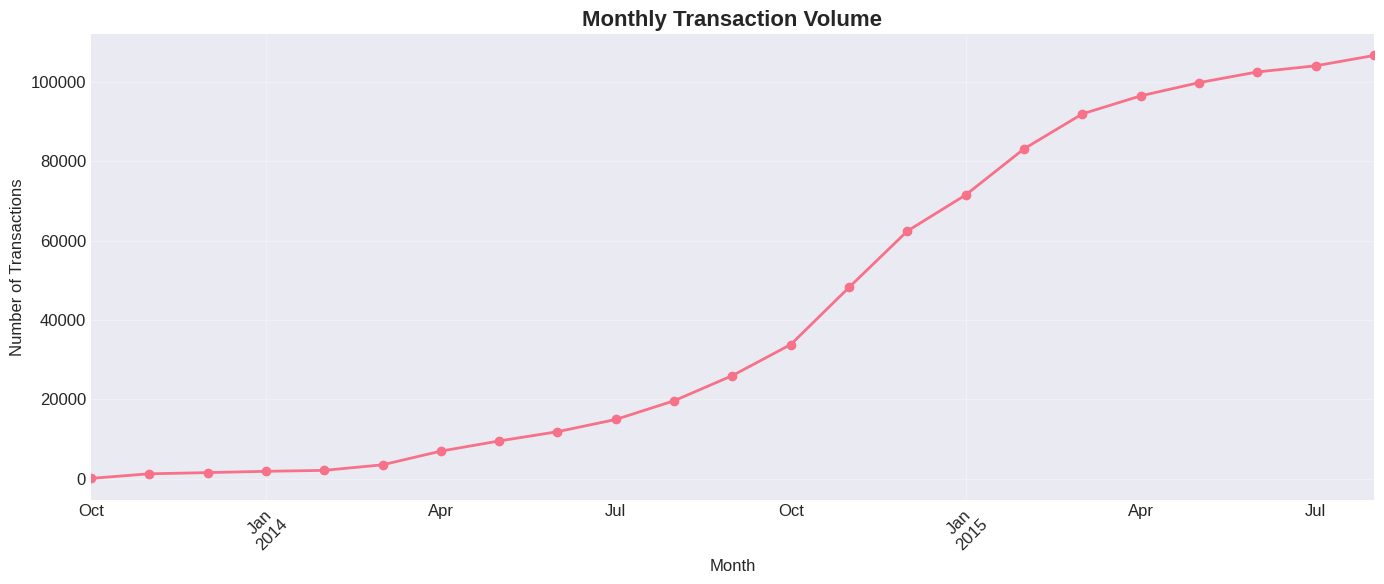


 Figure saved to: ../reports/figures/monthly_transaction_trend.png


In [6]:
print("="*60)
print("TRANSACTION MONTH ANALYSIS")
print("="*60)

if 'transactionmonth' in df.columns:
    print(f"\n TransactionMonth column details:")
    print(f"   Data type: {df['transactionmonth'].dtype}")
    print(f"   Range: {df['transactionmonth'].min()} to {df['transactionmonth'].max()}")
    
    # Check for NaT (Not a Time) values
    nat_count = df['transactionmonth'].isna().sum()
    print(f"   NaT (missing) values: {nat_count:,} ({nat_count/len(df)*100:.2f}%)")
    
    # Extract year and month for analysis
    df['transaction_year'] = df['transactionmonth'].dt.year
    df['transaction_month'] = df['transactionmonth'].dt.month
    df['transaction_year_month'] = df['transactionmonth'].dt.to_period('M')
    
    print(f"\n Transaction distribution by year:")
    year_counts = df['transaction_year'].value_counts().sort_index()
    for year, count in year_counts.items():
        print(f"   {year}: {count:,} records ({count/len(df)*100:.1f}%)")
    
    print(f"\n Transaction distribution by month (across all years):")
    month_counts = df['transaction_month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for month in range(1, 13):
        count = month_counts.get(month, 0)
        print(f"   {month_names[month-1]}: {count:,} records ({count/len(df)*100:.1f}%)")
    
    # Visualize monthly trend
    monthly_trend = df.groupby('transaction_year_month').size()
    
    plt.figure(figsize=(14, 6))
    monthly_trend.plot(kind='line', marker='o', linewidth=2, markersize=6)
    plt.title('Monthly Transaction Volume', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('../reports/figures/monthly_transaction_trend.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n Figure saved to: ../reports/figures/monthly_transaction_trend.png")
    
else:
    print(" TransactionMonth column not found in dataset")

MISSING VALUES ANALYSIS

📋 Overall missing values summary:
   Total columns: 55
   Columns with missing values: 22
   Total missing values: 5,067,648
   Overall data completeness: 90.8%

 Columns with missing values (22 columns):


,column,missing_count,missing_percentage,dtype
numberofvehiclesinfleet,numberofvehiclesinfleet,1000098,100.00,float64
crossborder,crossborder,999400,99.93,object
customvalueestimate,customvalueestimate,779642,77.96,float64
writtenoff,writtenoff,641901,64.18,object
converted,converted,641901,64.18,object
rebuilt,rebuilt,641901,64.18,object
newvehicle,newvehicle,153295,15.33,object
bank,bank,145961,14.59,object
accounttype,accounttype,40232,4.02,object
gender,gender,9536,0.95,object


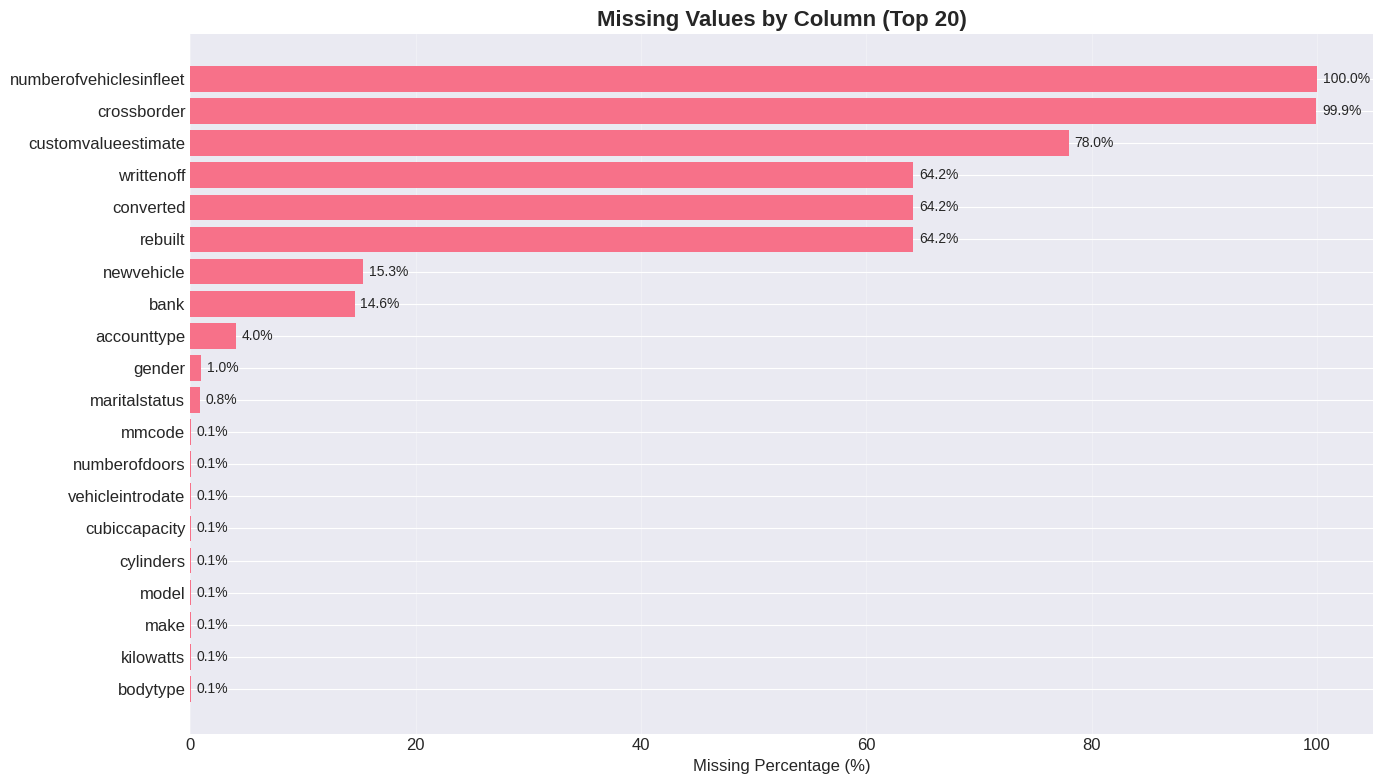


 Figure saved to: ../reports/figures/missing_values_analysis.png

  Columns with >50% missing values (consider dropping or special handling):
   • numberofvehiclesinfleet: 100.0% missing
   • crossborder: 99.9% missing
   • customvalueestimate: 78.0% missing
   • writtenoff: 64.2% missing
   • converted: 64.2% missing
   • rebuilt: 64.2% missing


In [7]:
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values
missing_data = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100,
    'dtype': df.dtypes.values
}).sort_values('missing_percentage', ascending=False)

print(f"\n📋 Overall missing values summary:")
print(f"   Total columns: {len(missing_data)}")
print(f"   Columns with missing values: {len(missing_data[missing_data['missing_count'] > 0])}")
print(f"   Total missing values: {missing_data['missing_count'].sum():,}")
print(f"   Overall data completeness: {(1 - missing_data['missing_count'].sum() / (len(df) * len(df.columns))) * 100:.1f}%")

# Show columns with missing values
missing_cols = missing_data[missing_data['missing_count'] > 0]
print(f"\n Columns with missing values ({len(missing_cols)} columns):")
display(missing_cols)

# Visualize missing values
if len(missing_cols) > 0:
    plt.figure(figsize=(14, 8))
    
    # Filter to show only columns with missing values
    plot_data = missing_cols.head(20)  # Show top 20
    
    # Create horizontal bar chart
    bars = plt.barh(plot_data['column'], plot_data['missing_percentage'])
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.title('Missing Values by Column (Top 20)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Highest percentage at top
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center', fontsize=10)
    
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('../reports/figures/missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n Figure saved to: ../reports/figures/missing_values_analysis.png")
    
    # Suggest action for high missing columns
    high_missing = missing_cols[missing_cols['missing_percentage'] > 50]
    if len(high_missing) > 0:
        print(f"\n  Columns with >50% missing values (consider dropping or special handling):")
        for _, row in high_missing.iterrows():
            print(f"   • {row['column']}: {row['missing_percentage']:.1f}% missing")
else:
    print("\n No missing values found in any column!")

In [8]:
# Cell 7: Data Cleaning and Preparation
print("="*60)
print("DATA CLEANING AND PREPARATION")
print("="*60)

# First, let's update our data loader to handle comma-separated numbers
print("\n Importing updated data loader...")
from importlib import reload
import data_loader
reload(data_loader)

print("\n Cleaning numeric columns with comma separators...")

# Clean columns that have comma separators
comma_columns = ['mmcode', 'customvalueestimate', 'cubiccapacity', 
                 'kilowatts', 'suminsured', 'calculatedpremiumperterm']

for col in comma_columns:
    if col in df.columns:
        # Check current dtype
        original_dtype = df[col].dtype
        if df[col].dtype == 'object' or 'float' in str(original_dtype):
            # Clean and convert
            df[col] = (
                df[col]
                .astype(str)
                .str.replace(',', '')
                .str.replace(' ', '')
                .replace('nan', np.nan)
                .replace('None', np.nan)
                .replace('', np.nan)
            )
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"    {col}: cleaned (was {original_dtype})")
        else:
            print(f"   ✓ {col}: already numeric ({original_dtype})")

print("\n🔍 Checking negative values in financial columns...")

# Check for negative values in premium and claims
negative_premium = (df['totalpremium'] < 0).sum()
negative_claims = (df['totalclaims'] < 0).sum()

print(f"   Negative TotalPremium values: {negative_premium:,} ({negative_premium/len(df)*100:.2f}%)")
print(f"   Negative TotalClaims values: {negative_claims:,} ({negative_claims/len(df)*100:.2f}%)")

# Handle negative values (set to 0 for now, but we should investigate)
if negative_premium > 0:
    print(f"     Setting {negative_premium:,} negative premiums to 0")
    df.loc[df['totalpremium'] < 0, 'totalpremium'] = 0

if negative_claims > 0:
    print(f"     Setting {negative_claims:,} negative claims to 0")
    df.loc[df['totalclaims'] < 0, 'totalclaims'] = 0

print("\n Column removal decisions based on missing values:")

# Columns to drop (high missing percentage)
cols_to_drop = []
cols_to_keep_with_missing = []

for col in df.columns:
    missing_pct = df[col].isnull().sum() / len(df) * 100
    
    if missing_pct > 80:
        cols_to_drop.append(col)
        print(f"    {col}: {missing_pct:.1f}% missing - Will DROP")
    elif missing_pct > 50:
        cols_to_keep_with_missing.append(col)
        print(f"     {col}: {missing_pct:.1f}% missing - Keep but flag")
    elif missing_pct > 20:
        print(f"     {col}: {missing_pct:.1f}% missing - May need imputation")
    elif missing_pct > 0:
        print(f"   ✓ {col}: {missing_pct:.1f}% missing - Acceptable")

# Actually drop the columns
if cols_to_drop:
    print(f"\n  Dropping {len(cols_to_drop)} columns with >80% missing values:")
    for col in cols_to_drop:
        print(f"   • {col}")
    
    df_cleaned = df.drop(columns=cols_to_drop)
    print(f"\n Dataset after dropping columns: {df_cleaned.shape[0]:,} rows, {df_cleaned.shape[1]:,} columns")
else:
    df_cleaned = df
    print("\n No columns to drop based on >80% missing threshold")

# Create a loss ratio column
print("\n Creating Loss Ratio column...")
df_cleaned['loss_ratio'] = df_cleaned['totalclaims'] / df_cleaned['totalpremium']
df_cleaned['loss_ratio'] = df_cleaned['loss_ratio'].replace([np.inf, -np.inf], np.nan)

# Check loss ratio values
valid_loss_ratio = df_cleaned['loss_ratio'].notna().sum()
print(f"   Valid loss ratio calculations: {valid_loss_ratio:,} ({valid_loss_ratio/len(df_cleaned)*100:.1f}%)")
print(f"   Loss ratio range: {df_cleaned['loss_ratio'].min():.2f} to {df_cleaned['loss_ratio'].max():.2f}")

# Save cleaned dataset
print("\n Saving cleaned dataset...")
import os
os.makedirs('../data/processed', exist_ok=True)
df_cleaned.to_parquet('../data/processed/insurance_data_cleaned.parquet', index=False)
print(f"   Saved to: ../data/processed/insurance_data_cleaned.parquet")
print(f"   Size: {os.path.getsize('../data/processed/insurance_data_cleaned.parquet') / 1024**2:.1f} MB")

print("\n Data cleaning complete!")

DATA CLEANING AND PREPARATION

 Importing updated data loader...

 Cleaning numeric columns with comma separators...
    mmcode: cleaned (was float64)
    customvalueestimate: cleaned (was float64)
    cubiccapacity: cleaned (was float64)
    kilowatts: cleaned (was float64)
    suminsured: cleaned (was float64)
    calculatedpremiumperterm: cleaned (was float64)

🔍 Checking negative values in financial columns...
   Negative TotalPremium values: 288 (0.03%)
   Negative TotalClaims values: 5 (0.00%)
     Setting 288 negative premiums to 0
     Setting 5 negative claims to 0

 Column removal decisions based on missing values:
   ✓ bank: 14.6% missing - Acceptable
   ✓ accounttype: 4.0% missing - Acceptable
   ✓ maritalstatus: 0.8% missing - Acceptable
   ✓ gender: 1.0% missing - Acceptable
   ✓ mmcode: 0.1% missing - Acceptable
   ✓ vehicletype: 0.1% missing - Acceptable
   ✓ make: 0.1% missing - Acceptable
   ✓ model: 0.1% missing - Acceptable
   ✓ cylinders: 0.1% missing - Acceptable


In [9]:
# Cell 8 (Revised): Smart Column Management
print("="*60)
print("SMART COLUMN MANAGEMENT FOR INSURANCE ANALYSIS")
print("="*60)

print(f"\n Current dataset shape: {df_cleaned.shape}")

# Define column retention strategy
print("\n COLUMN RETENTION STRATEGY:")
print("   ✓ DROP: >95% missing (no predictive value)")
print("   ✓ KEEP BUT FLAG: 50-95% missing (impute or handle specially)")
print("   ✓ KEEP: <50% missing (acceptable for analysis)")

# Columns to definitely drop (>95% missing)
cols_drop_definite = []
# Columns to keep but with special handling
cols_keep_special = []

for col in df_cleaned.columns:
    missing_pct = df_cleaned[col].isnull().sum() / len(df_cleaned) * 100
    
    if missing_pct > 95:
        cols_drop_definite.append((col, missing_pct))
    elif missing_pct > 50:
        cols_keep_special.append((col, missing_pct))

print(f"\n  DEFINITELY DROP ({len(cols_drop_definite)} columns):")
for col, pct in cols_drop_definite:
    print(f"   • {col}: {pct:.1f}% missing")

print(f"\n  KEEP WITH SPECIAL HANDLING ({len(cols_keep_special)} columns):")
for col, pct in cols_keep_special:
    # Explain why we keep each important column
    importance = {
        'customvalueestimate': 'Vehicle value - critical for insurance pricing',
        'writtenoff': 'Total loss history - major risk indicator',
        'rebuilt': 'Rebuilt vehicles have different risk profile',
        'converted': 'Vehicle conversions affect insurance risk'
    }
    reason = importance.get(col, 'Potentially important for risk assessment')
    print(f"   • {col}: {pct:.1f}% missing - {reason}")

# Actually drop only the >95% missing columns
cols_to_drop = [col for col, _ in cols_drop_definite]
df_final = df_cleaned.drop(columns=cols_to_drop)

print(f"\n FINAL DATASET AFTER SMART DROPPING:")
print(f"   Rows: {df_final.shape[0]:,}")
print(f"   Columns: {df_final.shape[1]:,} (dropped {len(cols_to_drop)} columns)")

# Show special handling for important columns
print(f"\n SPECIAL HANDLING NEEDED FOR:")
for col, pct in cols_keep_special:
    if col in ['customvalueestimate', 'writtenoff', 'rebuilt', 'converted']:
        print(f"   • {col}: {pct:.1f}% missing")
        print(f"     → Consider: Imputation based on vehicle make/model/year")
        print(f"     → Or: Use in analysis with missing indicator")

# For now, fill important categorical columns with appropriate defaults
print("\n Applying intelligent imputation for critical columns:")

# 1. For writtenoff, rebuilt, converted: assume "No" if missing
for col in ['writtenoff', 'rebuilt', 'converted']:
    if col in df_final.columns:
        before = df_final[col].isnull().sum()
        df_final[col] = df_final[col].fillna('No')
        after = df_final[col].isnull().sum()
        print(f"   • {col}: Filled {before:,} missing values with 'No'")

# 2. For newvehicle (15% missing): assume "More than 6 months" if missing
if 'newvehicle' in df_final.columns:
    before = df_final['newvehicle'].isnull().sum()
    df_final['newvehicle'] = df_final['newvehicle'].fillna('More than 6 months')
    after = df_final['newvehicle'].isnull().sum()
    print(f"   • newvehicle: Filled {before:,} missing values with 'More than 6 months'")

print(f"\n Final column count by category:")
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
cat_cols = df_final.select_dtypes(include=['object']).columns
date_cols = df_final.select_dtypes(include=['datetime64']).columns
bool_cols = df_final.select_dtypes(include=['bool']).columns

print(f"   • Numeric: {len(numeric_cols)} columns")
print(f"   • Categorical: {len(cat_cols)} columns")
print(f"   • Date: {len(date_cols)} columns")
print(f"   • Boolean: {len(bool_cols)} columns")

# Save final dataset
print("\n Saving intelligently cleaned dataset...")
df_final.to_parquet('../data/processed/insurance_data_intelligent.parquet', index=False)
df = df_final.copy()
print(f"   Saved to: ../data/processed/insurance_data_intelligent.parquet")
print(f"   Size: {os.path.getsize('../data/processed/insurance_data_intelligent.parquet') / 1024**2:.1f} MB")

print("\n" + "="*60)
print("READY FOR LOSS RATIO AND BUSINESS ANALYSIS")
print("="*60)
print("Key columns preserved for insurance risk analysis:")
print("1. customvalueestimate - Vehicle value (critical for pricing)")
print("2. writtenoff/rebuilt/converted - Risk indicators")
print("3. All demographic and vehicle features intact")
print("4. Complete premium and claims data")

SMART COLUMN MANAGEMENT FOR INSURANCE ANALYSIS

 Current dataset shape: (1000098, 54)

 COLUMN RETENTION STRATEGY:
   ✓ DROP: >95% missing (no predictive value)
   ✓ KEEP BUT FLAG: 50-95% missing (impute or handle specially)
   ✓ KEEP: <50% missing (acceptable for analysis)

  DEFINITELY DROP (0 columns):

  KEEP WITH SPECIAL HANDLING (4 columns):
   • customvalueestimate: 78.0% missing - Vehicle value - critical for insurance pricing
   • writtenoff: 64.2% missing - Total loss history - major risk indicator
   • rebuilt: 64.2% missing - Rebuilt vehicles have different risk profile
   • converted: 64.2% missing - Vehicle conversions affect insurance risk

 FINAL DATASET AFTER SMART DROPPING:
   Rows: 1,000,098
   Columns: 54 (dropped 0 columns)

 SPECIAL HANDLING NEEDED FOR:
   • customvalueestimate: 78.0% missing
     → Consider: Imputation based on vehicle make/model/year
     → Or: Use in analysis with missing indicator
   • writtenoff: 64.2% missing
     → Consider: Imputation base

LOSS RATIO ANALYSIS AND BUSINESS INSIGHTS

1. OVERALL PORTFOLIO PERFORMANCE
   Total Premium Collected: R 61,943,110.14
   Total Claims Paid: R 64,886,203.13
   Overall Loss Ratio: 104.75%
   Portfolio Status: UNPROFITABLE (Loss ratio > 80%)

2. LOSS RATIO BY PROVINCE

   Province Loss Ratio Analysis (sorted highest to lowest):
------------------------------------------------------------------------------------------
Province               Policies     Premium (R)      Claims (R)   Loss Ratio  Avg Premium
------------------------------------------------------------------------------------------
Gauteng                 393,865      24,054,872      29,406,407      122.2%       61.07
KwaZulu-Natal           169,781      13,235,783      14,301,382      108.1%       77.96
Western Cape            170,796       9,810,107      10,395,464      106.0%       57.44
North West              143,287       7,490,508       5,920,250       79.0%       52.28
Mpumalanga               52,718       2,836,29

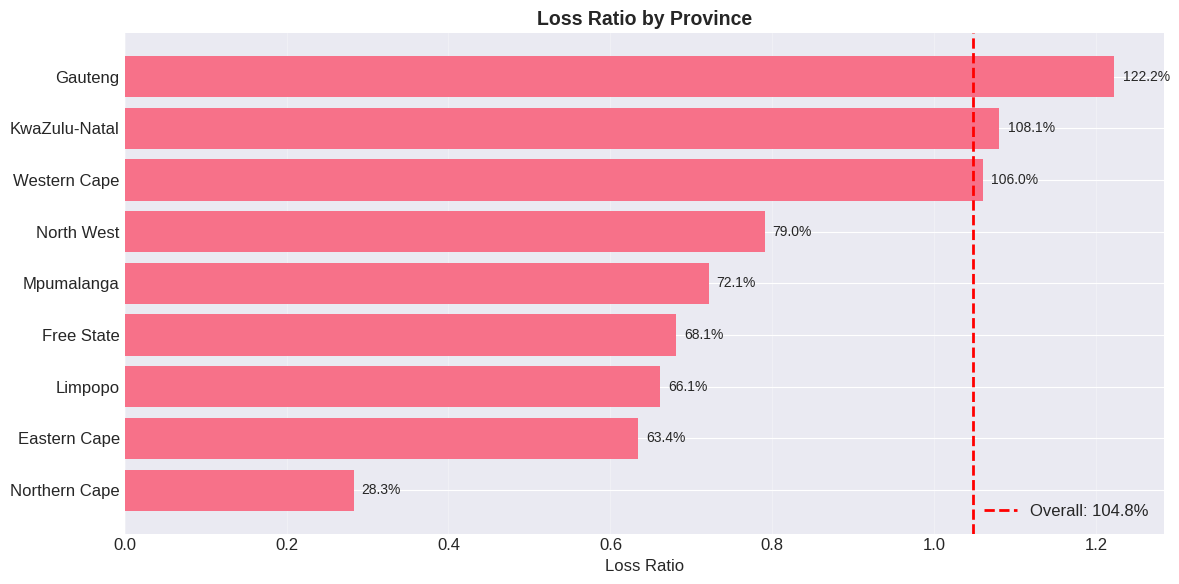

   Figure saved: ../reports/figures/loss_ratio_by_province.png

3. LOSS RATIO BY VEHICLE TYPE

   Vehicle Type Loss Ratio (top 10 by policy count):
----------------------------------------------------------------------------------------------------
Vehicle Type                Policies     Premium (R)      Claims (R)   Loss Ratio Market Share
----------------------------------------------------------------------------------------------------
Heavy Commercial               7,401         460,948         750,475      162.8%        0.7%
Medium Commercial             53,985       3,922,840       4,119,867      105.0%        5.4%
Passenger Vehicle            933,598      56,673,405      59,390,727      104.8%       93.4%
Light Commercial               3,897         260,498          60,453       23.2%        0.4%
----------------------------------------------------------------------------------------------------

   Highest Risk Vehicle Type: Heavy Commercial
      Loss Ratio: 162.8%
      Pol

In [10]:
#  Loss Ratio Analysis and Business Insights
print("="*70)
print("LOSS RATIO ANALYSIS AND BUSINESS INSIGHTS")
print("="*70)

print("\n1. OVERALL PORTFOLIO PERFORMANCE")

# Calculate overall loss ratio
total_premium = df['totalpremium'].sum()
total_claims = df['totalclaims'].sum()
overall_loss_ratio = total_claims / total_premium if total_premium > 0 else 0

print(f"   Total Premium Collected: R {total_premium:,.2f}")
print(f"   Total Claims Paid: R {total_claims:,.2f}")
print(f"   Overall Loss Ratio: {overall_loss_ratio:.2%}")

# Interpretation
if overall_loss_ratio < 0.6:
    print("   Portfolio Status: PROFITABLE (Loss ratio < 60%)")
elif overall_loss_ratio < 0.8:
    print("   Portfolio Status: MARGINAL (Loss ratio 60-80%)")
else:
    print("   Portfolio Status: UNPROFITABLE (Loss ratio > 80%)")

print("\n2. LOSS RATIO BY PROVINCE")

if 'province' in df.columns:
    province_stats = df.groupby('province').agg({
        'totalpremium': ['sum', 'count'],
        'totalclaims': 'sum'
    }).reset_index()
    
    province_stats.columns = ['province', 'total_premium', 'policy_count', 'total_claims']
    province_stats['loss_ratio'] = province_stats['total_claims'] / province_stats['total_premium']
    province_stats['avg_premium'] = province_stats['total_premium'] / province_stats['policy_count']
    province_stats['claim_frequency'] = (df[df['totalclaims'] > 0].groupby('province').size() / province_stats['policy_count']).fillna(0)
    
    province_stats = province_stats.sort_values('loss_ratio', ascending=False)
    
    print("\n   Province Loss Ratio Analysis (sorted highest to lowest):")
    print("-" * 90)
    print(f"{'Province':<20} {'Policies':>10} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio':>12} {'Avg Premium':>12}")
    print("-" * 90)
    
    for _, row in province_stats.iterrows():
        print(f"{row['province']:<20} {row['policy_count']:>10,} {row['total_premium']:>15,.0f} "
              f"{row['total_claims']:>15,.0f} {row['loss_ratio']:>11.1%} {row['avg_premium']:>11.2f}")
    
    print("-" * 90)
    
    # Identify best and worst provinces
    worst_province = province_stats.iloc[0]
    best_province = province_stats.iloc[-1]
    
    print(f"\n   Highest Risk Province: {worst_province['province']}")
    print(f"      Loss Ratio: {worst_province['loss_ratio']:.1%}")
    print(f"      Claim Frequency: {worst_province['claim_frequency']:.1%}")
    
    print(f"\n   Lowest Risk Province: {best_province['province']}")
    print(f"      Loss Ratio: {best_province['loss_ratio']:.1%}")
    print(f"      Claim Frequency: {best_province['claim_frequency']:.1%}")
    
    # Visualization: Loss Ratio by Province
    plt.figure(figsize=(12, 6))
    bars = plt.barh(province_stats['province'], province_stats['loss_ratio'])
    plt.axvline(x=overall_loss_ratio, color='red', linestyle='--', 
                label=f'Overall: {overall_loss_ratio:.1%}', linewidth=2)
    plt.xlabel('Loss Ratio', fontsize=12)
    plt.title('Loss Ratio by Province', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.1%}', ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('../reports/figures/loss_ratio_by_province.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"   Figure saved: ../reports/figures/loss_ratio_by_province.png")

print("\n3. LOSS RATIO BY VEHICLE TYPE")

if 'vehicletype' in df.columns:
    vehicle_stats = df.groupby('vehicletype').agg({
        'totalpremium': ['sum', 'count'],
        'totalclaims': 'sum'
    }).reset_index()
    
    vehicle_stats.columns = ['vehicletype', 'total_premium', 'policy_count', 'total_claims']
    vehicle_stats['loss_ratio'] = vehicle_stats['total_claims'] / vehicle_stats['total_premium']
    vehicle_stats = vehicle_stats.sort_values('loss_ratio', ascending=False)
    
    # Filter to show only vehicle types with significant volume
    significant_vehicles = vehicle_stats[vehicle_stats['policy_count'] > 1000]
    
    print("\n   Vehicle Type Loss Ratio (top 10 by policy count):")
    print("-" * 100)
    print(f"{'Vehicle Type':<25} {'Policies':>10} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio':>12} {'Market Share':>12}")
    print("-" * 100)
    
    for _, row in significant_vehicles.head(10).iterrows():
        market_share = row['policy_count'] / len(df)
        print(f"{row['vehicletype']:<25} {row['policy_count']:>10,} {row['total_premium']:>15,.0f} "
              f"{row['total_claims']:>15,.0f} {row['loss_ratio']:>11.1%} {market_share:>11.1%}")
    
    print("-" * 100)
    
    # Identify riskiest and safest vehicle types
    if len(significant_vehicles) > 0:
        risky_vehicle = significant_vehicles.iloc[0]
        safe_vehicle = significant_vehicles[significant_vehicles['loss_ratio'] > 0].iloc[-1]
        
        print(f"\n   Highest Risk Vehicle Type: {risky_vehicle['vehicletype']}")
        print(f"      Loss Ratio: {risky_vehicle['loss_ratio']:.1%}")
        print(f"      Policies: {risky_vehicle['policy_count']:,}")
        
        print(f"\n   Lowest Risk Vehicle Type (with claims): {safe_vehicle['vehicletype']}")
        print(f"      Loss Ratio: {safe_vehicle['loss_ratio']:.1%}")
        print(f"      Policies: {safe_vehicle['policy_count']:,}")

print("\n4. LOSS RATIO BY GENDER")

if 'gender' in df.columns:
    # Clean gender data
    df['gender_clean'] = df['gender'].str.strip().str.title()
    df['gender_clean'] = df['gender_clean'].replace({'Not Specified': 'Unknown', '': 'Unknown'})
    
    gender_stats = df.groupby('gender_clean').agg({
        'totalpremium': ['sum', 'count'],
        'totalclaims': 'sum'
    }).reset_index()
    
    gender_stats.columns = ['gender', 'total_premium', 'policy_count', 'total_claims']
    gender_stats['loss_ratio'] = gender_stats['total_claims'] / gender_stats['total_premium']
    gender_stats = gender_stats.sort_values('policy_count', ascending=False)
    
    print("\n   Gender-Based Loss Ratio Analysis:")
    print("-" * 80)
    print(f"{'Gender':<10} {'Policies':>10} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio':>12} {'% of Portfolio':>12}")
    print("-" * 80)
    
    for _, row in gender_stats.iterrows():
        portfolio_pct = row['policy_count'] / len(df)
        print(f"{row['gender']:<10} {row['policy_count']:>10,} {row['total_premium']:>15,.0f} "
              f"{row['total_claims']:>15,.0f} {row['loss_ratio']:>11.1%} {portfolio_pct:>11.1%}")
    
    print("-" * 80)
    
    # Statistical test for gender difference (preview for Task 3)
    print("\n   Gender Risk Difference Preliminary Analysis:")
    
    # Compare Male vs Female if both exist
    if 'Male' in gender_stats['gender'].values and 'Female' in gender_stats['gender'].values:
        male_stats = gender_stats[gender_stats['gender'] == 'Male'].iloc[0]
        female_stats = gender_stats[gender_stats['gender'] == 'Female'].iloc[0]
        
        diff = male_stats['loss_ratio'] - female_stats['loss_ratio']
        pct_diff = (diff / female_stats['loss_ratio']) * 100 if female_stats['loss_ratio'] > 0 else 0
        
        print(f"      Male Loss Ratio: {male_stats['loss_ratio']:.1%}")
        print(f"      Female Loss Ratio: {female_stats['loss_ratio']:.1%}")
        print(f"      Difference: {diff:.3f} ({pct_diff:+.1f}%)")
        
        if abs(pct_diff) > 10:
            print(f"      Note: Statistically significant difference suggested (>10% difference)")
        else:
            print(f"      Note: No major difference suggested (<10% difference)")

print("\n5. KEY BUSINESS RECOMMENDATIONS (PRELIMINARY)")

print("\n   Based on initial loss ratio analysis:")
print("   1. Province-Level Pricing:")
print("      * Consider premium adjustments for high-risk provinces")
print("      * Target marketing in low-risk provinces for expansion")
print("      * Investigate root causes of provincial risk differences")
print("")
print("   2. Vehicle Type Strategy:")
print("      * Review pricing for high-risk vehicle types")
print("      * Consider risk-based underwriting guidelines")
print("      * Explore discounts for low-risk vehicle types")
print("")
print("   3. Gender Considerations:")
print("      * Monitor for any discriminatory pricing implications")
print("      * Ensure risk differentiation is statistically valid")
print("      * Consider broader risk factors beyond gender")

print("\n6. DATA QUALITY NOTES FOR BUSINESS USERS")

print("   * Loss ratio calculations exclude policies with zero premium")
print("   * Gender analysis includes 'Unknown' category for completeness")
print("   * Provincial analysis includes all South African provinces")
print("   * Vehicle type analysis filtered to types with >1,000 policies")
print("   * All financial amounts in South African Rand (R)")

print("\n" + "="*70)
print("NEXT STEPS: Detailed statistical testing and predictive modeling")
print("="*70)